In [1]:
import numpy as np

In [27]:
#inputfile='input_test.txt'
inputfile='input.txt'

with open(inputfile,'r') as f:
    lines=f.readlines()
lines = [line0.strip() for line0 in lines]

In [28]:
lines

['L 1',
 'D 2',
 'R 2',
 'L 1',
 'D 1',
 'L 1',
 'U 1',
 'R 1',
 'L 2',
 'R 2',
 'L 2',
 'D 1',
 'R 2',
 'D 1',
 'U 2',
 'R 2',
 'D 1',
 'R 1',
 'L 2',
 'R 1',
 'D 1',
 'U 2',
 'R 2',
 'D 1',
 'R 2',
 'L 1',
 'D 1',
 'U 1',
 'R 1',
 'D 2',
 'L 1',
 'D 1',
 'L 1',
 'U 1',
 'L 2',
 'U 1',
 'L 1',
 'U 1',
 'L 1',
 'D 2',
 'R 2',
 'U 1',
 'D 2',
 'R 1',
 'U 1',
 'D 1',
 'R 1',
 'U 2',
 'L 2',
 'D 2',
 'R 1',
 'U 2',
 'L 2',
 'U 1',
 'D 1',
 'L 1',
 'R 2',
 'L 2',
 'R 1',
 'D 2',
 'L 1',
 'D 2',
 'L 1',
 'R 2',
 'U 2',
 'D 2',
 'U 1',
 'R 2',
 'D 2',
 'L 2',
 'U 1',
 'D 2',
 'R 1',
 'L 2',
 'R 1',
 'L 2',
 'U 2',
 'D 2',
 'U 2',
 'D 2',
 'R 1',
 'U 2',
 'L 2',
 'D 1',
 'U 2',
 'L 1',
 'D 1',
 'R 2',
 'U 1',
 'L 1',
 'D 1',
 'U 2',
 'D 2',
 'R 2',
 'U 1',
 'L 2',
 'D 2',
 'L 1',
 'D 2',
 'L 1',
 'U 1',
 'R 2',
 'L 2',
 'D 1',
 'R 2',
 'U 2',
 'R 2',
 'L 2',
 'D 1',
 'R 1',
 'L 1',
 'D 2',
 'U 2',
 'L 1',
 'D 1',
 'R 1',
 'L 3',
 'U 2',
 'R 2',
 'D 3',
 'L 1',
 'R 3',
 'L 1',
 'R 2',
 'D 1',


In [29]:
len(lines)

2000

In [30]:
movechar_to_movevector_dict = { 'R':(1,0), 'L':(-1,0), 'U':(0,1), 'D':(0,-1) }

In [31]:
# notation (x,y)
startpos = (0,0)
hx, hy = startpos
tx , ty = startpos

head_positions = [startpos]
tail_positions = [startpos]
tail_track = {startpos}

for line0 in lines:
    line0_split = line0.split(' ')

    #Move head
    hmovedir = line0_split[0]
    hmove_vector = movechar_to_movevector_dict[hmovedir]
    
    hmove_length = int(line0_split[1])
    
    print(f"line: {line0}, hx,hy={hx},{hy} , tx,ty={tx},{ty}")

    for ihmoves in range(hmove_length):
            
        hx += hmove_vector[0]
        hy += hmove_vector[1]

        head_positions.append( (hx,hy) )
        
        
        #Move tail, following head
        distx = hx-tx
        disty = hy-ty

        tmovex, tmovey=(0,0)

        if abs(distx)>=2 or abs(disty)>=2:
            #Only move if one of the distances is 2 or over
            
            #Following
            if abs(distx)>=1:
                tmovex = int(distx / abs(distx))
            if abs(disty)>=1:
                tmovey = int(disty / abs(disty))
            
            tx+=tmovex
            ty+=tmovey

        tail_positions.append((tx,ty))

        tail_track.add((tx,ty))

        print(f"new hx,y: {hx},{hy} , distx,y:{distx},{disty} , tmovex,y: {tmovex},{tmovey}, new tx,y:{tx},{ty}")


line: L 1, hx,hy=0,0 , tx,ty=0,0
new hx,y: -1,0 , distx,y:-1,0 , tmovex,y: 0,0, new tx,y:0,0
line: D 2, hx,hy=-1,0 , tx,ty=0,0
new hx,y: -1,-1 , distx,y:-1,-1 , tmovex,y: 0,0, new tx,y:0,0
new hx,y: -1,-2 , distx,y:-1,-2 , tmovex,y: -1,-1, new tx,y:-1,-1
line: R 2, hx,hy=-1,-2 , tx,ty=-1,-1
new hx,y: 0,-2 , distx,y:1,-1 , tmovex,y: 0,0, new tx,y:-1,-1
new hx,y: 1,-2 , distx,y:2,-1 , tmovex,y: 1,-1, new tx,y:0,-2
line: L 1, hx,hy=1,-2 , tx,ty=0,-2
new hx,y: 0,-2 , distx,y:0,0 , tmovex,y: 0,0, new tx,y:0,-2
line: D 1, hx,hy=0,-2 , tx,ty=0,-2
new hx,y: 0,-3 , distx,y:0,-1 , tmovex,y: 0,0, new tx,y:0,-2
line: L 1, hx,hy=0,-3 , tx,ty=0,-2
new hx,y: -1,-3 , distx,y:-1,-1 , tmovex,y: 0,0, new tx,y:0,-2
line: U 1, hx,hy=-1,-3 , tx,ty=0,-2
new hx,y: -1,-2 , distx,y:-1,0 , tmovex,y: 0,0, new tx,y:0,-2
line: R 1, hx,hy=-1,-2 , tx,ty=0,-2
new hx,y: 0,-2 , distx,y:0,0 , tmovex,y: 0,0, new tx,y:0,-2
line: L 2, hx,hy=0,-2 , tx,ty=0,-2
new hx,y: -1,-2 , distx,y:-1,0 , tmovex,y: 0,0, new tx,y:0,-2
new 

In [58]:
len(tail_track)
#This is the answer to part1

5619

In [33]:
tail_track

{(117, -84),
 (62, -20),
 (175, -143),
 (39, -4),
 (78, -76),
 (23, -12),
 (-5, -74),
 (210, -186),
 (55, -60),
 (-3, -65),
 (16, -15),
 (57, -14),
 (145, -130),
 (115, -73),
 (15, -11),
 (6, -60),
 (50, -17),
 (163, -140),
 (11, -9),
 (85, -60),
 (30, 4),
 (43, -57),
 (1, -54),
 (36, -60),
 (210, -173),
 (-6, -57),
 (38, -14),
 (-3, -52),
 (184, -189),
 (-4, -11),
 (216, -237),
 (128, -121),
 (105, -68),
 (-11, -51),
 (108, -63),
 (52, 5),
 (126, -46),
 (43, -44),
 (-18, -54),
 (58, -59),
 (135, -105),
 (54, -57),
 (128, -108),
 (86, -105),
 (31, -41),
 (88, -59),
 (126, -33),
 (5, -94),
 (49, -51),
 (123, -102),
 (68, -38),
 (213, -172),
 (42, -54),
 (116, -105),
 (61, -41),
 (19, -38),
 (-9, -100),
 (137, -46),
 (12, -41),
 (53, -40),
 (72, -27),
 (88, -46),
 (-14, -94),
 (123, -89),
 (68, -25),
 (26, -22),
 (83, -40),
 (41, -37),
 (34, -40),
 (-7, -78),
 (111, -86),
 (56, -22),
 (185, -137),
 (14, -19),
 (71, -37),
 (145, -88),
 (157, -78),
 (60, -11),
 (25, -32),
 (44, -19),
 (34,

# Try to show the trail track

In [37]:
trail_np = np.array(tail_track)

In [40]:
#Get max and min positions of trail track
xmin, xmax , ymin, ymax = 0,0,0,0
for x,y in tail_track:
    xmin = min(x, xmin)
    xmax = max(x, xmax)
    ymin = min(y,ymin)
    ymax = max(y,ymax)

print(xmin,xmax , ymin,ymax)

-29 224 -248 16


In [52]:
xlen = xmax-xmin+1
ylen = ymax-ymin+1

tail_track_bool = np.full( (xlen,ylen) , False)

for x,y in tail_track:
    ix = x-xmin
    iy = y- ymin

    tail_track_bool[ix,iy]=True

In [53]:
tail_track_bool

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

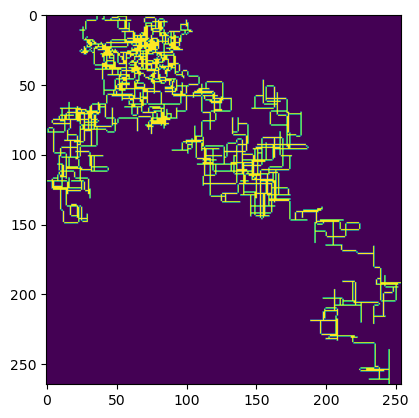

In [57]:
import matplotlib.pyplot as plt
plt.imshow(np.flipud(np.transpose(tail_track_bool))) # need to transpose because in imshow uses (y,x) notation

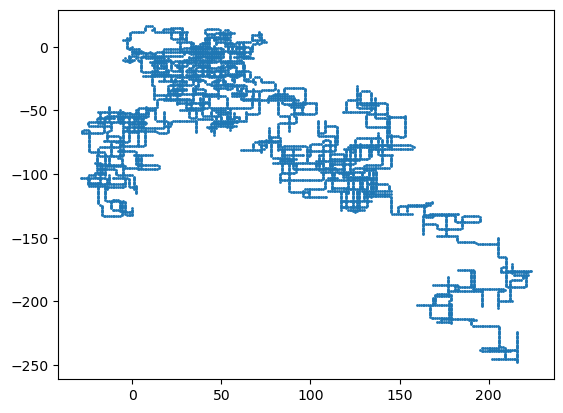

In [55]:
#Another way to show the trail track is to use scatter plot
X,Y = zip(*tail_track)
plt.scatter(X,Y, s=1)

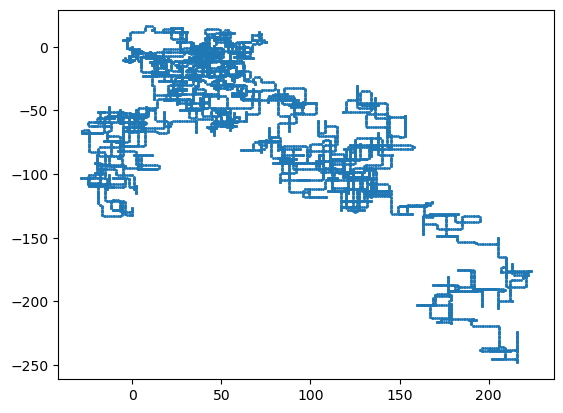

In [51]:
#Another way to show the trail track is to use scatter plot
X,Y = zip(*tail_positions)
plt.scatter(X,Y, s=1)